# Introduction to Support Vector Machines (SVM)
---

### Learning Objectives
- Understand how the SVM builds its decision threshold.
- Understand the concept of the maximum margin hyperplane.
- Visualize the linearly separable case in classification.
- Understand the math behind finding the maximum margin hyperplane.
- Understand the hinge loss for SVM.
- Understand how the regularization constant C allows SVMs to fit non-linearly separable problems.
- See how the kernel trick transforms problems from non-linearly separable to linearly separable.

### Lesson Guide
- [Introduction to SVMs](#intro)
- [How does the SVM classifiy?](#how-classify)
- [Intuition behind the decision boundary](#intuition)
- [Why maximize the margin?](#why-max-margin)
- [SVM origins: the perceptron algorithm](#perceptron)
- [The maximum margin hyperplane](#mmh)
    - [Finding the maximum margin](#finding-mmh)
- [The hinge loss](#hinge)
    - ["Slack"](#slack)
    - [The regularizing hyperparameter C](#hyper-c)
- [Pros and cons](#pros-and-cons)
- [When to use SVM vs. Logistic Regression](#when-to-use-svm)
- [Additional resources](#resources)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.datasets.samples_generator import make_blobs
from ipywidgets import interact
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='intro'></a>

## Introduction to SVMs

---

The Support Vector Machine (SVM) algorithm is a different approach to classification.

SVM still fits a decision boundary like a logistic regression regression, but uses a different loss function called the "hinge loss" (as opposed to the log loss in logistic regression).

This lesson will overview the details of the SVM algorithm.

<a id='how-classify'></a>

## How does the SVM classify?

---

It's important to start with the intuition for SVM with the special _**linearly separable**_ classification case.

If classification of observations is "linearly separable", SVM fits the **"decision boundary"** that is defined by the largest margin between the closest points for each class. This is commonly called the **"maximum margin hyperplane (MMH)"**.

<img alt="linearly separable SVM" src="https://drive.google.com/uc?export=view&id=1MFb7pYtS4382noHh4d9XH2JuY3oc-6Lf">


<a id='intuition'></a>

## Intuition behind the SVM decision boundary

---

SVM's criterion for a decision surface is one that is _maximally far away from any data point between classes_. The distance from the decision boundary to the closest data point determines the "margin" of the classifier.

The points SVM uses to fit the decision boundary are called "support vectors".


<img alt="linearly separable SVM MMH margin" src="https://drive.google.com/uc?export=view&id=1BH8i-q6IGdihcakgNIOaXrJgf0TiM3-i">


<a id='why-max-margin'></a>

## Why maximize the margin?

---

**SVM solves for a decision boundary that should theoretically minimize the generalization error.** 

Observations that are near the decision boundary between the classes are the observations with the most "ambiguous" labels. They are the observations that are approaching equal probability to be one class or the other (given the predictors).

SVM, instead of considering all the observations "equally" in the loss function it minimizes, defines it's fit using the most ambiguous points. It's decision boundary is safe in that errors in new measured observations are not likely to cause the SVM to mis-classify.

The SVM is concerned with generalization to new data.

<a id='perceptron'></a>

## SVM origins: the perceptron algorithm

---

The perceptron algorithm is a linear function of weights $w$ and predictors $X$ that assigns points to binary classes. If the function returns a value greater than 0 then the observation is classified as 1, otherwise it is classified as zero.

$f(X)$ below is the perceptron function to determine the classes. $b$ here is known as the "bias", which is analagous to the intercept term.

### $$ f(X) = \begin{cases}1 & \text{if }w \cdot x + b > 0\\0 & \text{otherwise}\end{cases} $$

If the points are linearly seperable, then solving the perceptron is guaranteed to converge on a solution, but that solution is not necessarily optimal for future observations. This led to the invention of the SVM, which finds the optimal discriminator: the maximum margin hyperplane.



<a id='mmh'></a>

## The maximum margin hyperplane

---

We choose a normalizing constant such that the distance from the plane to the closest points of either classes will be 1.

### $$ w^T x_{+} + b = 1 \\ w^T x_{-} + b = -1 $$

For the distance to the closest positive and negative class points, respectively (known as "support vectors").

If the normalizer for the weights is $||w||$, the size of the margin is then:

### $$ \text{margin} = \frac{2}{||w||} $$


<img alt="linearly separable SVM MMH margin" src="https://drive.google.com/uc?export=view&id=1qLIBZ-BFoBGhSVASrSrfFYIDuQWoNjib">


<a id='finding-mmh'></a>
### Finding the maximum margin

We want to find a distance between these points that is the widest possible. Therefore, we are looking to maximize the value $\frac{2}{||w||}$.

So, maximize the weights with constraints on what the function can output. When the target is 1, the function needs to be 1 or greater. When the target is 0 (or -1), the function needs to output -1 or lower.

### $$ \underset{w}{\text{max}} \frac{2}{||w||} \quad \text{subject to} \begin{cases}\text{if } y_i = 1 & w^T x_i + b \ge 1 \\ \text{if } y_i = -1 & w^T x_i + b \le -1 \end{cases} \text{for } i \text{ in } N$$

Note here that $y$ is specified as either 1 or -1, as opposed to the 0, 1 that we are used to. This is convenient for converting this to be a minimization. To make this a minimization, we can change the equation to be:

### $$ \underset{w}{\text{min }} ||w||^2 \quad \text{subject to} \quad y(w^T x_i + b) \ge 1 $$

Which works out because when $y = -1$ the values become positive.

<img alt="linearly separable SVM MMH margin" src="https://drive.google.com/uc?export=view&id=1xlGPhO7iM6j_z4mojfF_rc4fpwVe0KIF">

<a id='hinge'></a>

## The hinge loss and non-linearly separable cases

---

In cases where there is no line or plane that can separate all of the points perfectly, we need to introduce the capacity for model error. Using the constraint above that $y(w^T X + b) \ge 1$, we can introduce the **hinge loss function**:

### $$ \text{hinge loss} = \sum_{i=1}^n \max\left(0, 1 - y_i(w^T x_i + b)\right) $$

Where now, if the point is on the correct side (correctly classified), the value will be 0. If the point is not $\ge 1$, this function will be greater than zero.

Using $f(x_i) = (w^T x_i + b)$, 

### $$\text{hinge loss} = \sum_{i=1}^N max\left(0, 1 - y_i \: f(x_i)\right)$$ 

If $f(x_i) > 1$, the point lies _outside_ the margin and does not contribute to the loss.

If $f(x_i) = 1$ the point is _on_ the margin and does not contribute to the loss.

If $f(x_i) < 1$ the point lies _inside_ the margin and **does** contribute to the loss.


<img alt="Hinge los" src="https://drive.google.com/uc?export=view&id=1xfp83zTY6ChrfAat4PKvtDITa0bJGbGT">


<a id='slack'></a>

### Hinge loss and "slack"

When we have a scenario where it is not possible to perfectly separate, we use the hinge loss with a regularization constant $C$:

### $$ \min ||w||^2 + C\sum_{i=1}^N \epsilon_i \quad \text{subject to} \quad y(w^T x_i + b) \ge 1 - \epsilon_i $$

Where the $\epsilon$ are the errors of the classifier, and the $C$ is a regularization term that determines how much the classification errors matter (relative to the maximization of the margin).

The function that the SVM minimizes to find the boundary is:

### $$  \underset{w}{\text{min }} ||w||^2 + C\sum_{i=1}^N max\left(0, 1 - y_i(w^T x_i + b)\right) $$

A small $C$ creates a wider margin because errors will matter less. A large $C$ creates a tighter margin because errors matter more. An infinite $C$ parameter is a "hard" margin, which always minimizes error over the size of the boundary.

We are trying to minimize the norm of the weights $||w||$ and thus maximize the margin, but now we are also trying to minimize our errors at the same time. We have a balance in our minimization between how wide the margin should be and how much error we tolerate.


<a id='hyper-c'></a>
### The regularizing hyper-parameter $C$

By setting the hyper-parameter $C$ we can control the extent to which our SVM is tolerant to misclassification errors. It is sometimes called the "soft-margin constant". 

$C$ affects the strength of the "penalty", similar to the lambda terms in the Ridge and Lasso. 

By multiplying the sum of the errors, which are the distances from the margins to the points inside of the margin, it allows the SVM to classify non-linearly separable problems by allowing errors to occur. 

The lower the value of $C$, the more misclassified observations errors are allowed. These misclassified points are known as "slack variables". Reducing the effect of errors on the loss function puts the emphasis on widening the margin.

For those interested in exporing the math more, [there is a good tutorial here.](http://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/#more-457)


<img alt="soft margin" src="https://drive.google.com/uc?export=view&id=1TSQkGGbt2fdRKliDRjzUxAveMjv5BF1t">

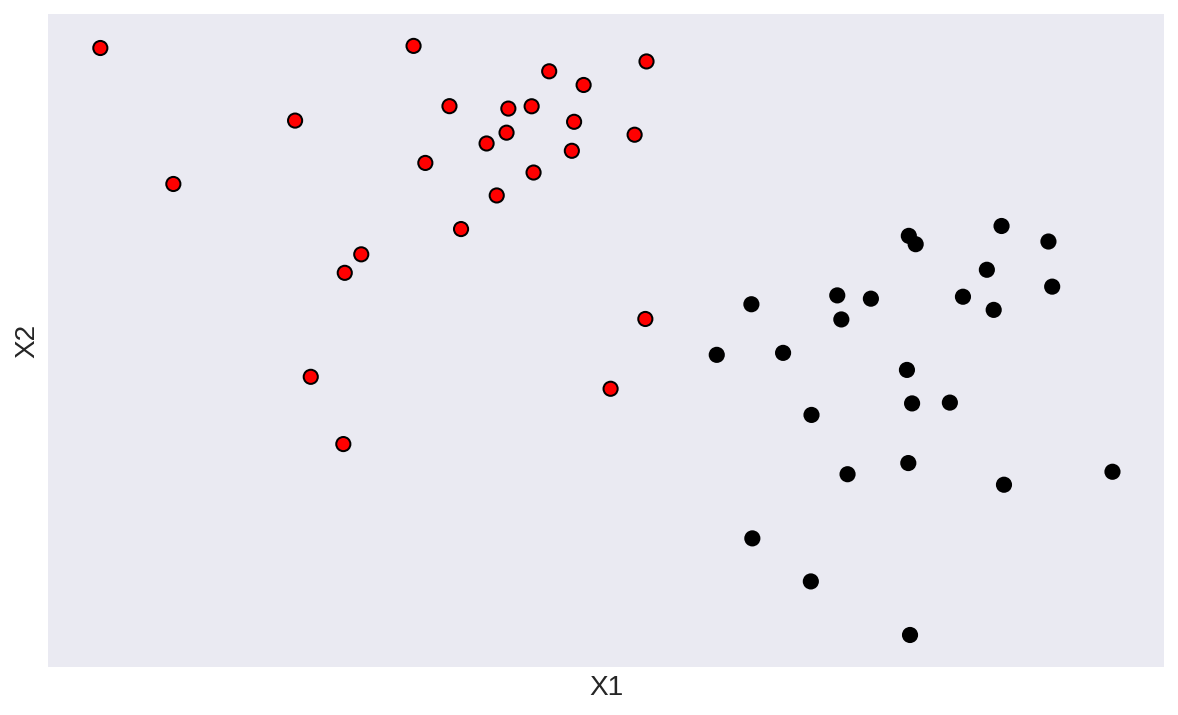

In [0]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('X1', fontsize=14)
ax.set_ylabel('X2', fontsize=14)

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=121, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.flag, edgecolors='black', linewidth=1);

<img alt="soft margin" src="https://drive.google.com/uc?export=view&id=15pvAPhKP0G5Dk0Txz64zbx4WVMnFudU0">


<a id='kernel'></a>
## The "kernel trick" for non-linearly separable problems

---

The "kernel trick" allows an SVM to classify non-linearly separable problems. It is a big reason why SVMs are so popular.

The idea behind the kernel trick is that you can arbitrarily transform your observations that _have no linear separability_ by putting them into a different "dimensional space" where the DO have linear separability, fit an SVM in that higher dimensional space, and then invert the transformation of the data and the model itself back into the original space.

This is done by "wrapping" your predictors in a kernel function that transforms them into this higher dimensional space. 

[Check out these lecture slides for more detail.](http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf)

The following pictures should give you a general intuition for what is happening.

<img alt="kernel transform viz" src="https://drive.google.com/uc?export=view&id=1zbhE3RQ8HOJHz_KREdE_6e3nQQ8MoYAQ">


<img alt="kernel transform viz" src="https://drive.google.com/uc?export=view&id=1GicywKJs38iGttjXCyztdQG5PtPvdBss">


<img alt="polynomial kernel" src="https://drive.google.com/uc?export=view&id=1ld129Q6SwJ3txNMjMQF1JWtiC3ndeyFA">


### Compare SVM kernels visually using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

In [0]:
from sklearn.datasets import make_circles
circles, y = make_circles(n_samples=1000, random_state=123, noise=0.05, factor=0.2)
df = pd.DataFrame(dict(x=circles[:,0], y=circles[:,1], label=y))

In [0]:
def plot_circles(df):
    colors = {0:'red', 1:'blue'}
    grouped = df.groupby('label')
    fig, ax = plt.subplots()
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter',x='x', y='y', label=key, color=colors[key])
    plt.show()

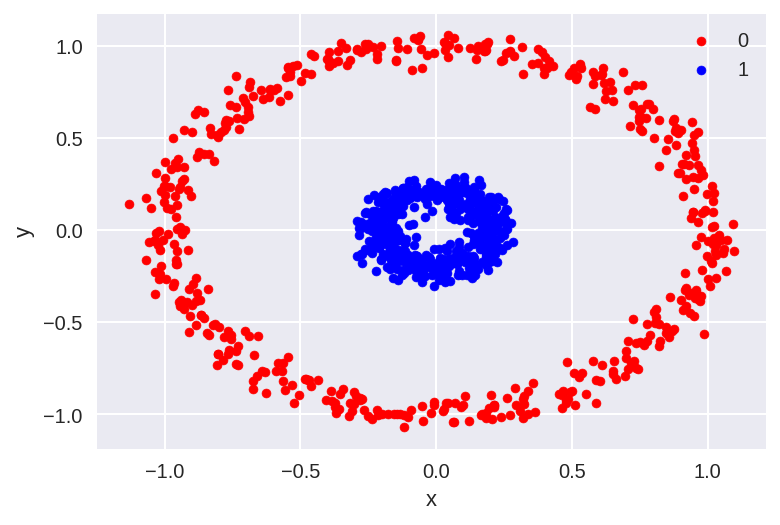

In [0]:
plot_circles(df)

In [0]:
# let's try to predict them without graphs
logreg = LogisticRegression()
print("Logistic Regression:",cross_val_score(logreg, circles, y, cv=5, scoring='accuracy').mean())

svc = SVC(kernel = 'linear')        # linear
print( "SVM with linear kernel:",cross_val_score(svc, circles, y, cv=5, scoring='accuracy').mean())


poly_svc = SVC(kernel = 'poly', degree = 4)        #  polys
print("SVM with poly kernel:",cross_val_score(poly_svc, circles, y, cv=5, scoring='accuracy').mean())

rbf_svc = SVC(kernel = 'rbf', C=10)           # rbf
print("SVM with rbf kernel:",cross_val_score(rbf_svc, circles, y, cv=5, scoring='accuracy').mean())


Logistic Regression: 0.48900000000000005
SVM with linear kernel: 0.649
SVM with poly kernel: 1.0
SVM with rbf kernel: 1.0


In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
for i in np.arange(0.1,10,0.5):
  rbf_svc = SVC(kernel = 'rbf', C=i)           # rbf
  
  print("SVM with rbf kernel having C = {} is {}".format(i,round(cross_val_score(rbf_svc, circles, y, cv=5, scoring='accuracy').mean(),3)))

SVM with rbf kernel having C = 0.1 is 1.0
SVM with rbf kernel having C = 0.6 is 1.0
SVM with rbf kernel having C = 1.1 is 1.0
SVM with rbf kernel having C = 1.6 is 1.0
SVM with rbf kernel having C = 2.1 is 1.0
SVM with rbf kernel having C = 2.6 is 1.0
SVM with rbf kernel having C = 3.1 is 1.0
SVM with rbf kernel having C = 3.6 is 1.0
SVM with rbf kernel having C = 4.1 is 1.0
SVM with rbf kernel having C = 4.6 is 1.0
SVM with rbf kernel having C = 5.1 is 1.0
SVM with rbf kernel having C = 5.6 is 1.0
SVM with rbf kernel having C = 6.1 is 1.0
SVM with rbf kernel having C = 6.6 is 1.0
SVM with rbf kernel having C = 7.1 is 1.0
SVM with rbf kernel having C = 7.6 is 1.0
SVM with rbf kernel having C = 8.1 is 1.0
SVM with rbf kernel having C = 8.6 is 1.0
SVM with rbf kernel having C = 9.1 is 1.0
SVM with rbf kernel having C = 9.6 is 1.0


Evaluate linear, polynomial (degree 3) and rbf kernels with default parameters.

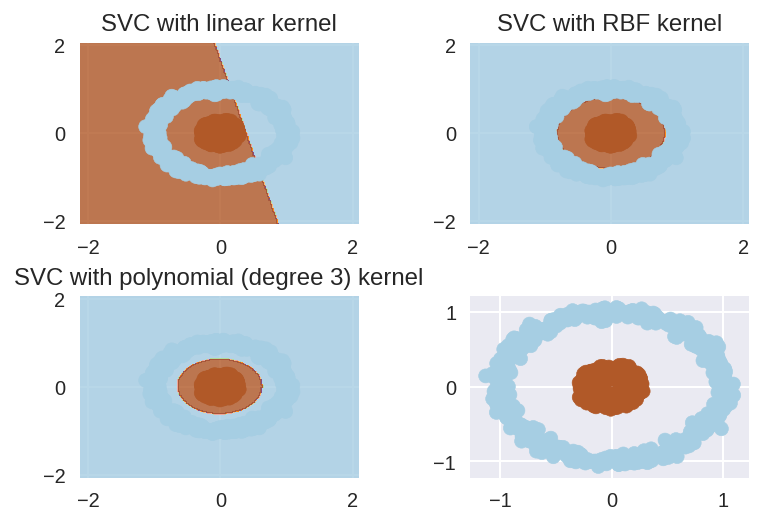

In [0]:
# create a mesh to plot in
x_min, x_max = circles[:, 0].min() - 1, circles[:, 0].max() + 1
y_min, y_max = circles[:, 1].min() - 1, circles[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    clf.fit(circles, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(circles[:, 0], circles[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(titles[i])
plt.subplot(2,2,4)
plt.scatter(circles[:, 0], circles[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

<a id="pros-and-cons"></a>
## Pros and cons
**Pros**
- Exceptional perfomance (historically widely used)
- Robust to outliers
- Effective in high dimensional data
- Can work with non-linearities
- Fast to compute even on non-linear (kernel trick)
- Low risk of overfitting

**Cons**
- Blackbox
- Can be slow on large datasets

<a id="when-to-use-svm"></a>
## When to use SVM vs. Logistic Regression
Advice from Andrew Ng:

**If there are more feature than training samples:**
    Use logistic regression or SVM without a kernel ("linear kernel")
    
**If there are about 10 times as many samples as features:**
    Use SVM with a Gaussian kernel
    
**If there are many more training samples than features:**
    Spend time feature engineering, then use logistic regression or SVM
    without a kernel

<a id='resources'></a>

## Additional resources

---

- [For a really great resource check out these slides (some of which are cannabalized in this lecture).](http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf)
- [This website is also a great resource, on a slightly more technical level.](http://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html)
- SVM docs on [SKLearn](http://scikit-learn.org/stable/modules/svm.html)
- Iris example on [SKLearn](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py)
- Hyperplane walkthrough on [SKLearn](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py)
- Andrew Ng's [notes](http://cs229.stanford.edu/notes/cs229-notes3.pdf) on SVM from CS 229